<a href="https://colab.research.google.com/github/VarelAntoni/DBS-Coding-Camp-2025/blob/main/Belajar_Machine_Learning_Untuk_Pemula/%5BClustering%5D_Submission_Akhir_BMLP_Muhammad_Varel_Antoni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sebastianwillmann/beverage-sales")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sebastianwillmann/beverage-sales/versions/1


In [ ]:
print(os.listdir(path))

['synthetic_beverage_sales_data.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, 'synthetic_beverage_sales_data.csv'))
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


In [ ]:
# mengambil 5000 baris secara acak
df = df.sample(n=5000, random_state=42)

df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
4990465,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29
5995542,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13
1044351,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21
1802181,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23
6900691,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 4990465 to 6204671
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       5000 non-null   object 
 1   Customer_ID    5000 non-null   object 
 2   Customer_Type  5000 non-null   object 
 3   Product        5000 non-null   object 
 4   Category       5000 non-null   object 
 5   Unit_Price     5000 non-null   float64
 6   Quantity       5000 non-null   int64  
 7   Discount       5000 non-null   float64
 8   Total_Price    5000 non-null   float64
 9   Region         5000 non-null   object 
 10  Order_Date     5000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 597.8+ KB


In [ ]:
df.describe(include="all")

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
count,5000,5000,5000,5000,5000,5000.000000,5000.000000,5000.00000,5000.000000,5000,5000
unique,4999,3921,2,47,4,NaN,NaN,NaN,NaN,16,1083
top,ORD2318730,CUS6702,B2C,Mango Juice,Water,NaN,NaN,NaN,NaN,Nordrhein-Westfalen,2023-04-05
freq,2,5,3261,194,1295,NaN,NaN,NaN,NaN,346,12
mean,NaN,NaN,NaN,NaN,NaN,6.036778,22.594600,0.02889,135.015748,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,15.596208,26.670323,0.04432,524.035420,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.330000,1.000000,0.00000,0.350000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.040000,6.000000,0.00000,8.237500,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.710000,11.000000,0.00000,20.460000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3.125000,27.000000,0.05000,68.377500,NaN,NaN


In [ ]:
df.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Customer_Type'].value_counts()

,count
Customer_Type,
B2C,3261
B2B,1739


In [ ]:
df['Product'].value_counts()

,count
Product,
Mango Juice,194
Granini Apple,178
Passion Fruit Juice,177
Hohes C Orange,174
Vio Wasser,167
Tomato Juice,167
Rauch Multivitamin,167
Cranberry Juice,165
Selters,161


In [ ]:
df['Category'].value_counts()

,count
Category,
Water,1295
Soft Drinks,1242
Alcoholic Beverages,1241
Juices,1222


In [ ]:
df['Region'].value_counts()

,count
Region,
Nordrhein-Westfalen,346
Sachsen-Anhalt,339
Hamburg,338
Rheinland-Pfalz,334
Bremen,326
Sachsen,317
Niedersachsen,316
Mecklenburg-Vorpommern,314
Schleswig-Holstein,310


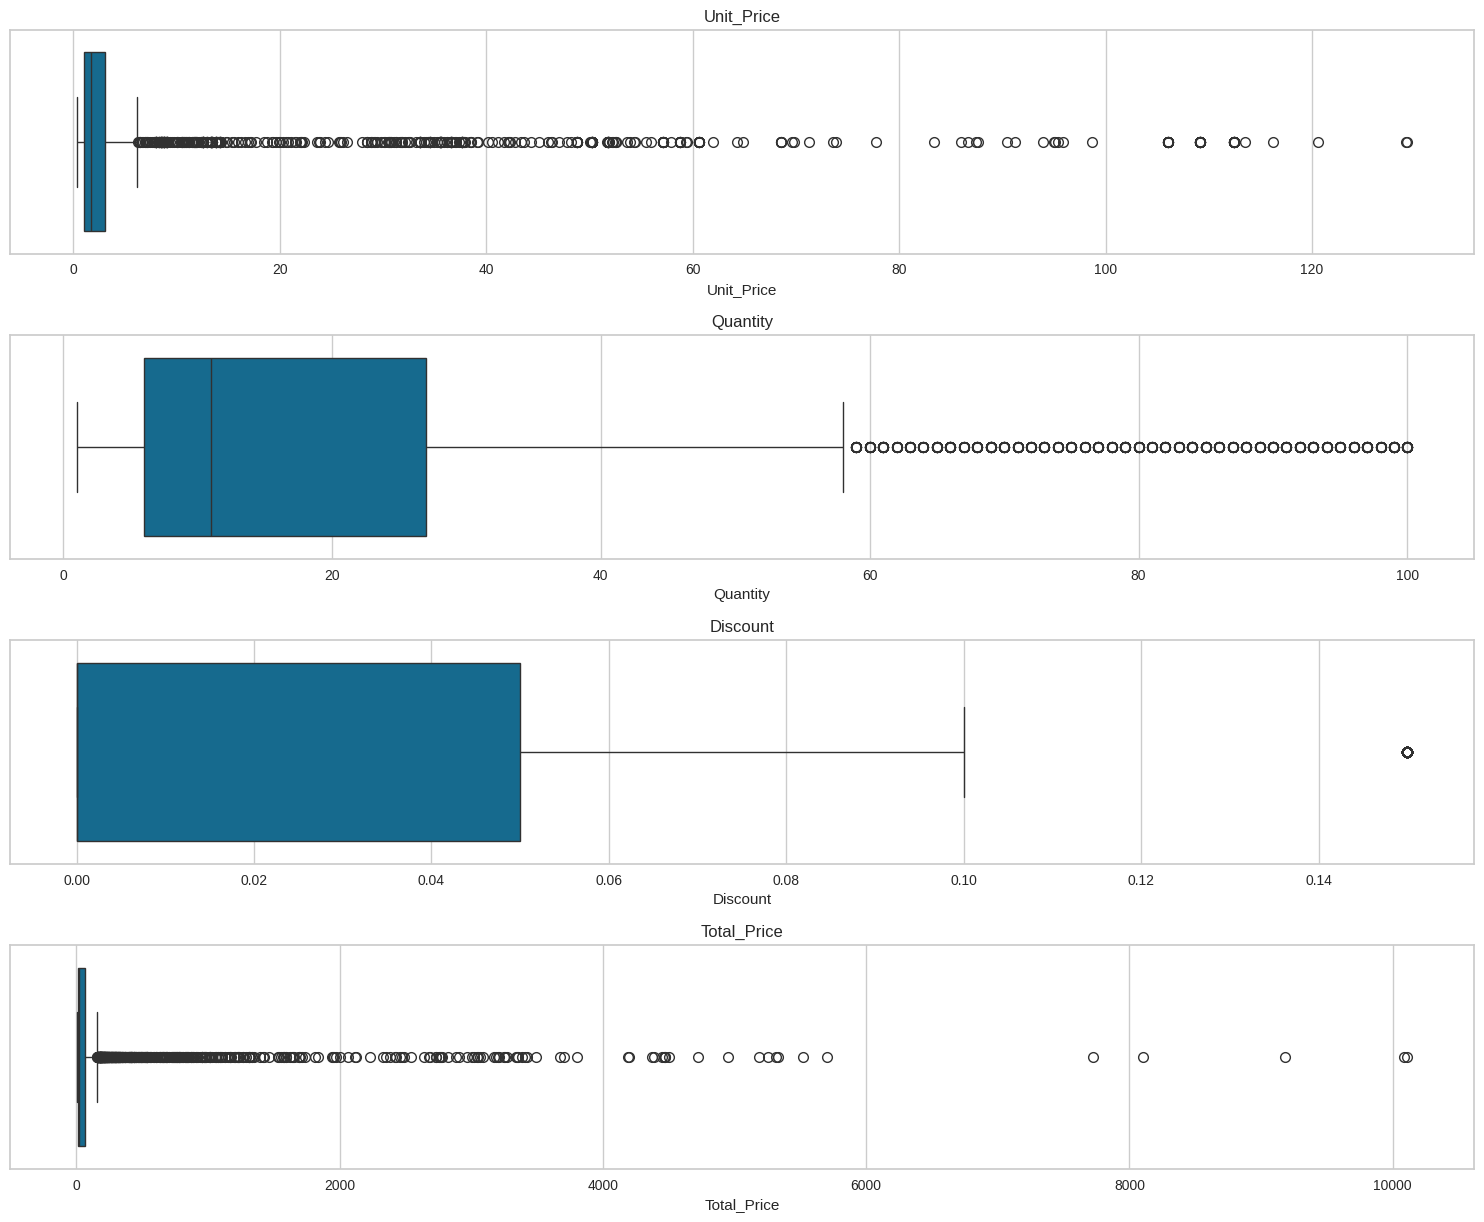

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns

num_plots = len(numerical_cols)
num_rows = 5
num_cols = (num_plots + num_rows - 1) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

if num_cols == 1:
    axes = axes.reshape(num_rows, num_cols)

for i, col in enumerate(numerical_cols):
    row = i // num_cols
    col_idx = i % num_cols
    sns.boxplot(x=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

for i in range(num_plots, num_rows * num_cols):
    row = i // num_cols
    col_idx = i % num_cols
    fig.delaxes(axes[row, col_idx])

plt.tight_layout()
plt.show()

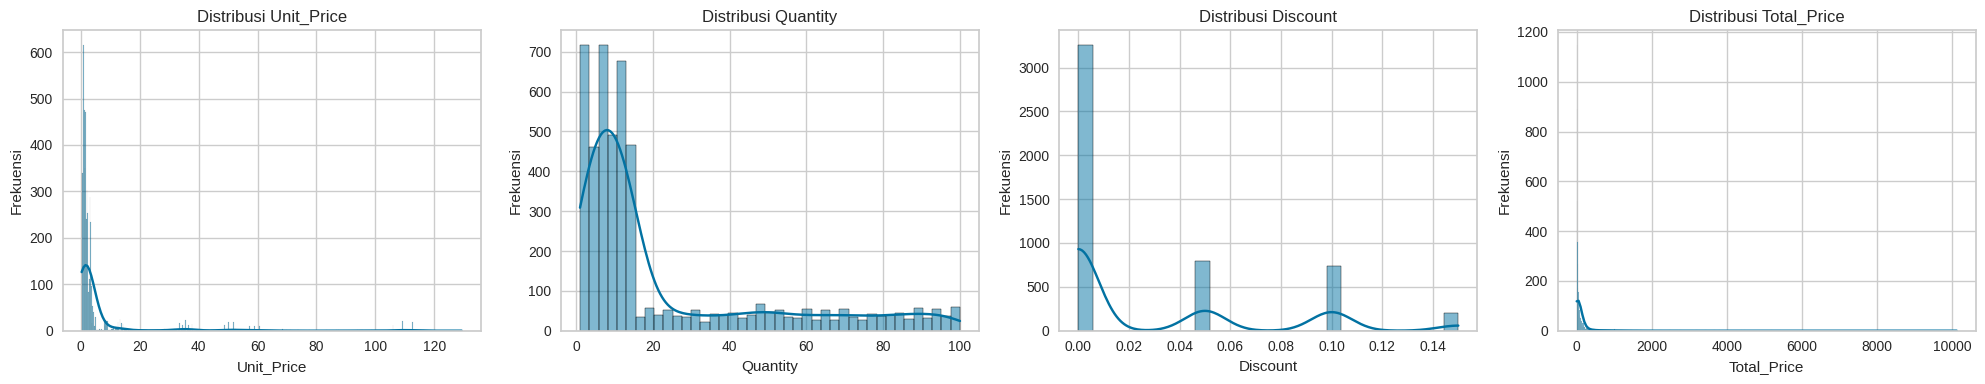

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns
num_cols = len(numeric_columns)

cols = 5
rows = (num_cols // cols) + (num_cols % cols > 0)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frekuensi')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

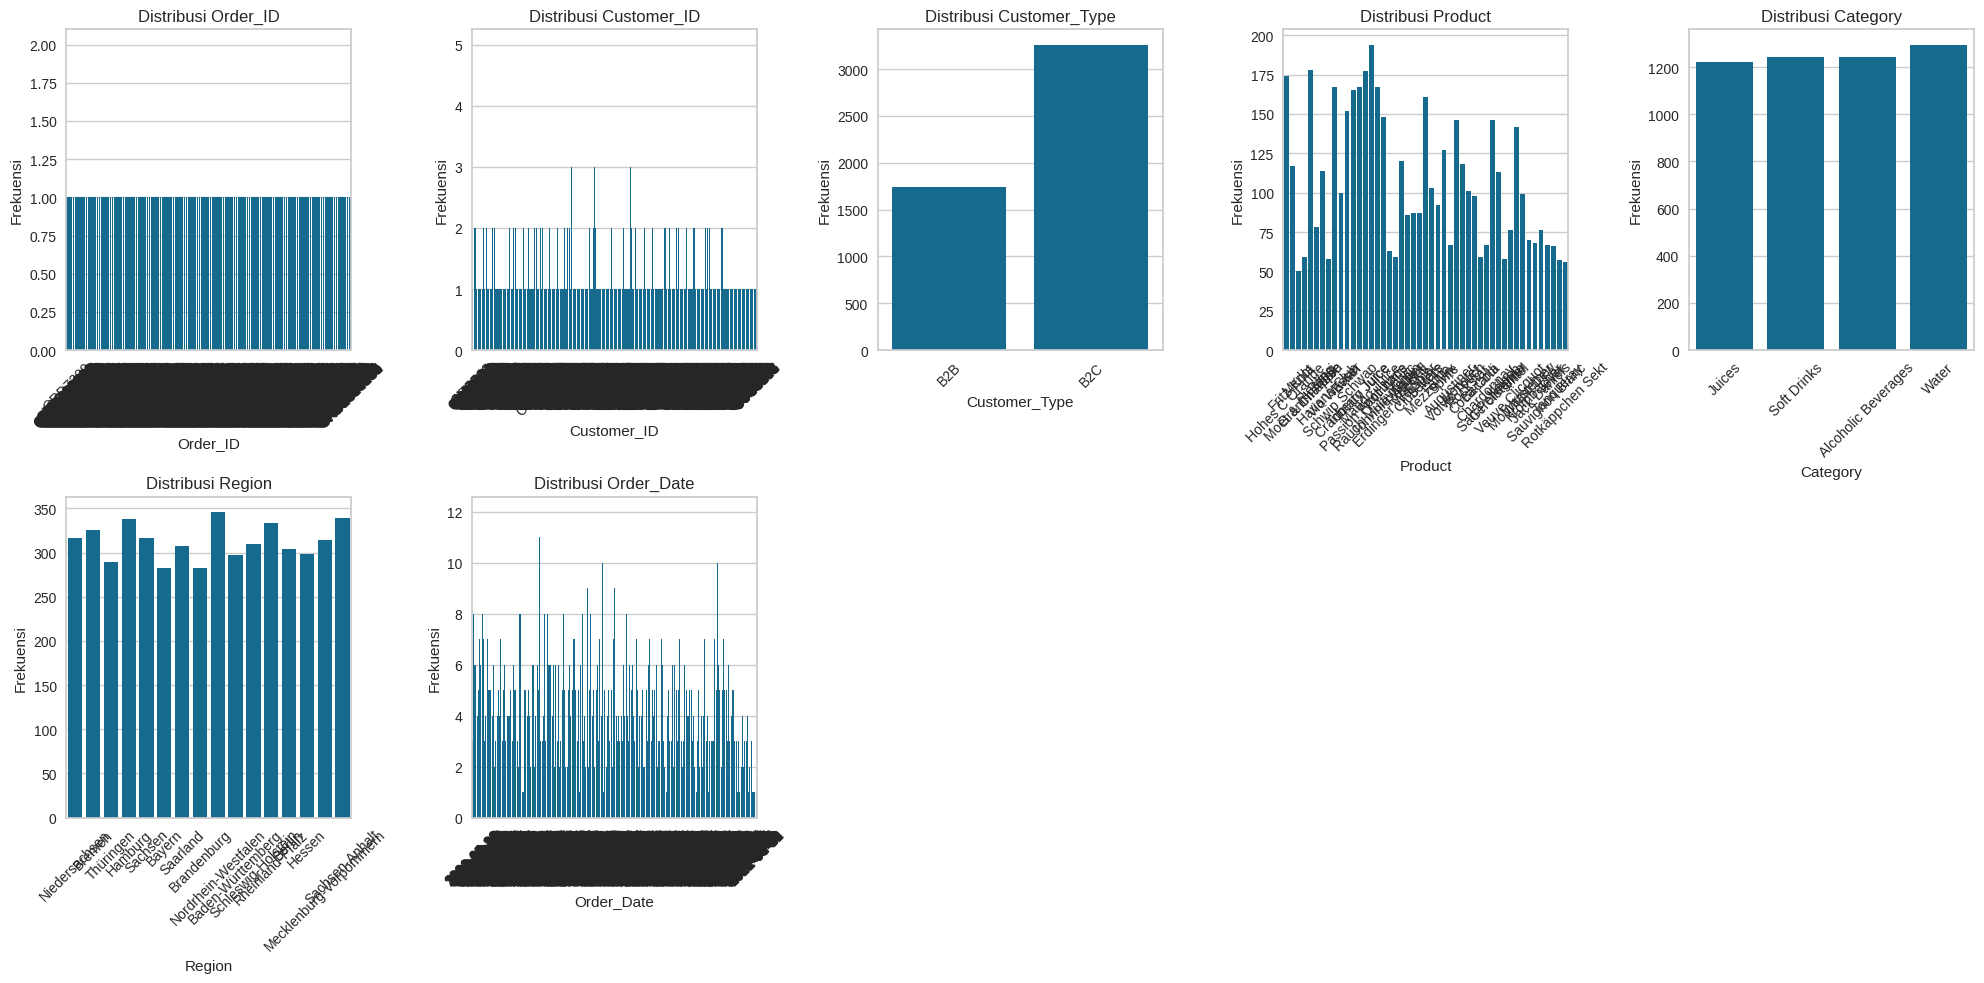

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns

num_plots = len(categorical_columns)
num_cols = 5
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Distribusi {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frekuensi')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

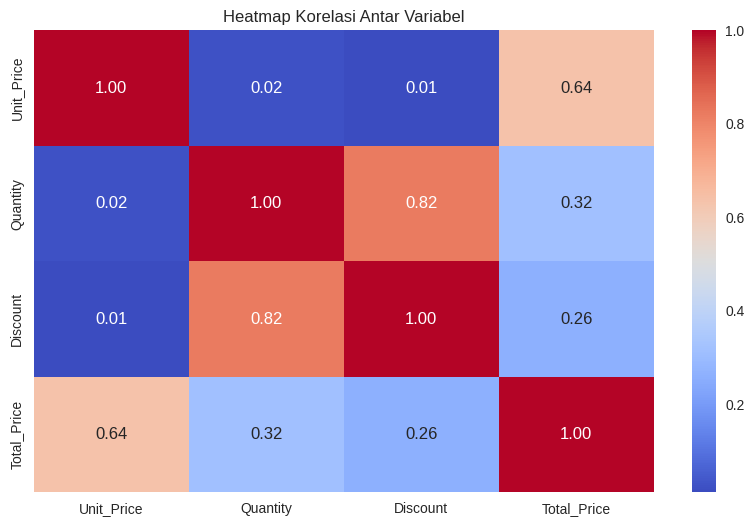

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
df_preprocessing = df[['Customer_Type', 'Category', 'Unit_Price', 'Quantity', 'Discount', 'Total_Price']]

In [ ]:
df_preprocessing.isnull().sum()

,0
Customer_Type,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0


In [ ]:
df_preprocessing.duplicated().sum()

np.int64(1649)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_preprocessing[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df_preprocessing.head())

        Customer_Type             Category  Unit_Price  Quantity  Discount  \
4990465           B2B               Juices   -0.267193  1.927631  1.604629   
5995542           B2B          Soft Drinks   -0.267193 -0.172291  0.476357   
1044351           B2B  Alcoholic Beverages    0.384954  1.815135  2.732901   
1802181           B2B  Alcoholic Beverages    3.775220  2.565107  1.604629   
6900691           B2C               Juices   -0.281941 -0.697272 -0.651916   

         Total_Price  
4990465    -0.019993  
5995542    -0.196639  
1044351     1.129033  
1802181     9.887943  
6900691    -0.245153  


<ipython-input-282-926ca271595b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessing[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:
numerical_cols = df_preprocessing.select_dtypes(include=np.number).columns

Q1 = df_preprocessing[numerical_cols].quantile(0.25)
Q3 = df_preprocessing[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

condition = ~((df_preprocessing[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_preprocessing[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df_preprocessing = df_preprocessing[condition]

df_preprocessing.head()

,Customer_Type,Category,Unit_Price,Quantity,Discount,Total_Price
5995542,B2B,Soft Drinks,-0.267193,-0.172291,0.476357,-0.196639
6900691,B2C,Juices,-0.281941,-0.697272,-0.651916,-0.245153
7916353,B2C,Soft Drinks,-0.275529,-0.659773,-0.651916,-0.241068
2410826,B2C,Juices,-0.271682,-0.284787,-0.651916,-0.206144
5008990,B2B,Water,-0.324264,-0.622274,0.476357,-0.247004


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoders = {}  # Dictionary untuk menyimpan encoder

for col in df_preprocessing.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_preprocessing[col] = le.fit_transform(df_preprocessing[col])  # Encoding
    encoders[col] = le  # Simpan encoder

print("Encoding selesai, encoder tersimpan:")
print(encoders.keys())  # Harusnya menampilkan kolom-kolom yang diencode

Encoding selesai, encoder tersimpan:
dict_keys(['Customer_Type', 'Category'])


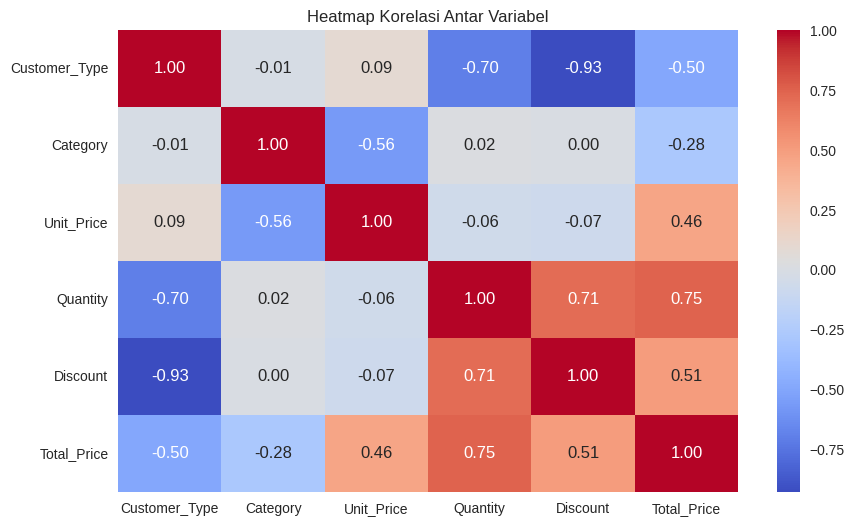

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_preprocessing.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

In [ ]:
df_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3735 entries, 5995542 to 6204671
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  3735 non-null   int64  
 1   Category       3735 non-null   int64  
 2   Unit_Price     3735 non-null   float64
 3   Quantity       3735 non-null   float64
 4   Discount       3735 non-null   float64
 5   Total_Price    3735 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 204.3 KB


In [ ]:
df_preprocessing.head()

,Customer_Type,Category,Unit_Price,Quantity,Discount,Total_Price
5995542,0,2,-0.267193,-0.172291,0.476357,-0.196639
6900691,1,1,-0.281941,-0.697272,-0.651916,-0.245153
7916353,1,2,-0.275529,-0.659773,-0.651916,-0.241068
2410826,1,1,-0.271682,-0.284787,-0.651916,-0.206144
5008990,0,3,-0.324264,-0.622274,0.476357,-0.247004


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
X = df_preprocessing.iloc[:, [0, 1, 2, 3, 4, 5]].values
print(pd.DataFrame(X, columns=['Customer_Type',	'Category',	'Unit_Price',	'Quantity',	'Discount',	'Total_Price']))

      Customer_Type  Category  Unit_Price  Quantity  Discount  Total_Price
0               0.0       2.0   -0.267193 -0.172291  0.476357    -0.196639
1               1.0       1.0   -0.281941 -0.697272 -0.651916    -0.245153
2               1.0       2.0   -0.275529 -0.659773 -0.651916    -0.241068
3               1.0       1.0   -0.271682 -0.284787 -0.651916    -0.206144
4               0.0       3.0   -0.324264 -0.622274  0.476357    -0.247004
...             ...       ...         ...       ...       ...          ...
3730            1.0       0.0   -0.110088 -0.359784 -0.651916    -0.150493
3731            1.0       3.0   -0.351196 -0.809767 -0.651916    -0.256603
3732            1.0       1.0   -0.271682 -0.772269 -0.651916    -0.250802
3733            1.0       1.0   -0.165235 -0.659773 -0.651916    -0.224656
3734            1.0       3.0   -0.280659 -0.359784 -0.651916    -0.216487

[3735 rows x 6 columns]


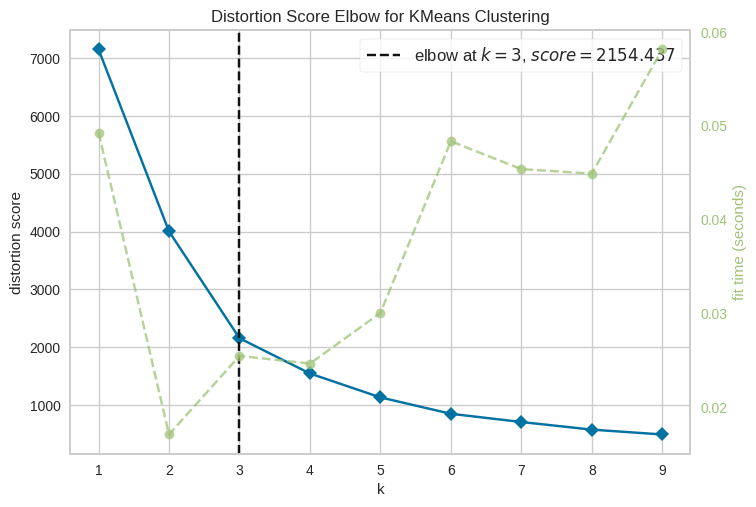

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(X)
visualizer.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_preprocessing['cluster'] = kmeans.fit_predict(X)

print(df_preprocessing.head())

         Customer_Type  Category  Unit_Price  Quantity  Discount  Total_Price  \
5995542              0         2   -0.267193 -0.172291  0.476357    -0.196639   
6900691              1         1   -0.281941 -0.697272 -0.651916    -0.245153   
7916353              1         2   -0.275529 -0.659773 -0.651916    -0.241068   
2410826              1         1   -0.271682 -0.284787 -0.651916    -0.206144   
5008990              0         3   -0.324264 -0.622274  0.476357    -0.247004   

         cluster  
5995542        0  
6900691        1  
7916353        2  
2410826        1  
5008990        0  


In [ ]:
from sklearn.metrics import silhouette_score

labels = kmeans.labels_

silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5621


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

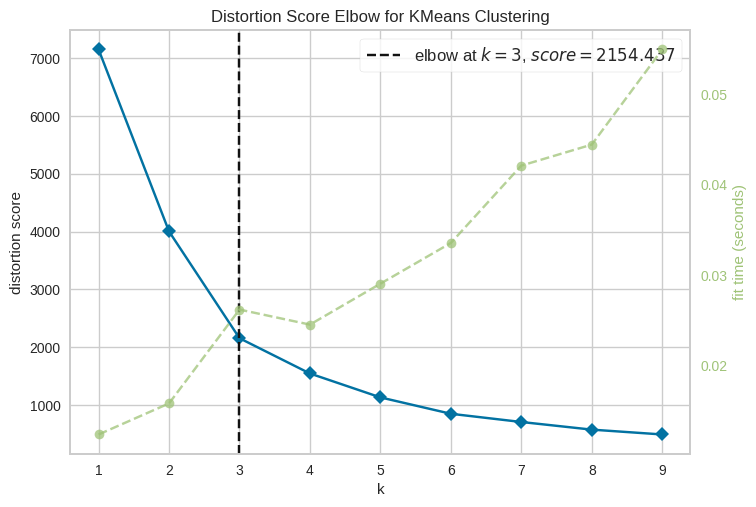

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(X)
visualizer.show()

In [ ]:
from sklearn.metrics import silhouette_score

labels = kmeans.labels_

silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.6995


nanggung banget yah 0.70 hiks

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

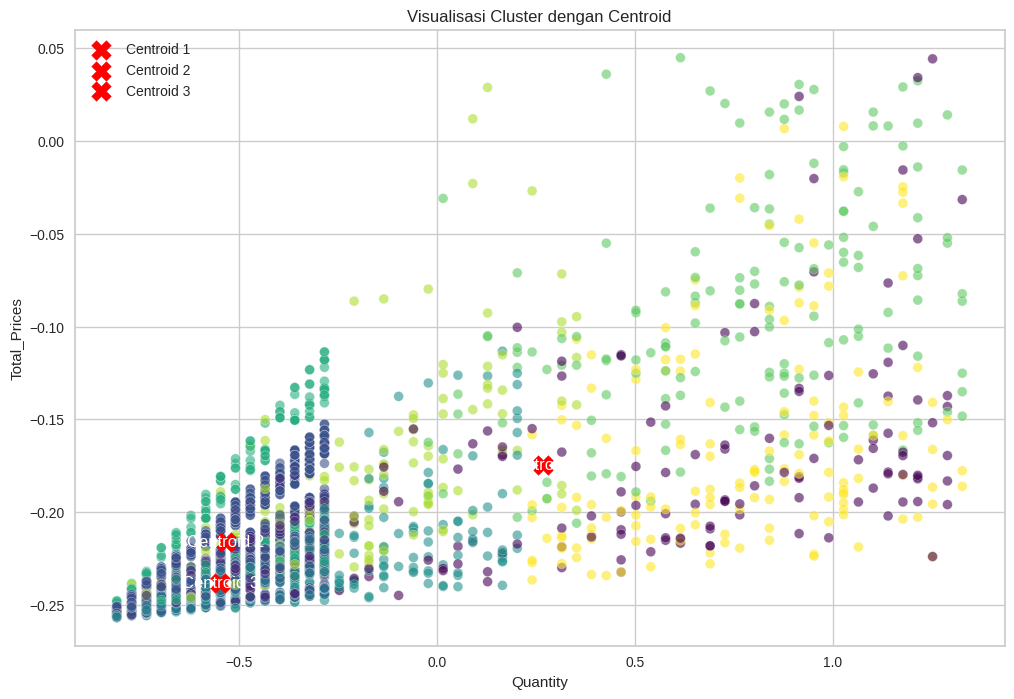

In [ ]:
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data hanya untuk fitur Quantity (index 3) dan Total_Prices (index 5)
plt.scatter(X[:, 3], X[:, 5], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid hanya sesuai jumlah cluster yang dilatih
for i in range(kmeans.n_clusters):
    plt.scatter(centroids[i, 3], centroids[i, 5], c='red', s=200, marker='X', label=f'Centroid {i+1}')
    plt.text(centroids[i, 3], centroids[i, 5], f'Centroid {i+1}', color='white', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Quantity')
plt.ylabel('Total_Prices')
plt.legend()

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
df_normalized = df_preprocessing.copy()

In [ ]:
df_normalized['cluster'] = kmeans.labels_

In [ ]:
# Gunakan kembali LabelEncoder yang sudah disimpan
for col in encoders:
    df_normalized[col] = encoders[col].inverse_transform(df_normalized[col].astype(int))

print(df_normalized.head())  # Cek apakah data sudah kembali seperti semula

        Customer_Type     Category  Unit_Price  Quantity  Discount  \
5995542           B2B  Soft Drinks   -0.267193 -0.172291  0.476357   
6900691           B2C       Juices   -0.281941 -0.697272 -0.651916   
7916353           B2C  Soft Drinks   -0.275529 -0.659773 -0.651916   
2410826           B2C       Juices   -0.271682 -0.284787 -0.651916   
5008990           B2B        Water   -0.324264 -0.622274  0.476357   

         Total_Price  cluster  
5995542    -0.196639        0  
6900691    -0.245153        1  
7916353    -0.241068        2  
2410826    -0.206144        1  
5008990    -0.247004        0  


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
df_normalized[numerical_cols] = scaler.inverse_transform(df_normalized[numerical_cols])

In [ ]:
df_normalized.head()

,Customer_Type,Category,Unit_Price,Quantity,Discount,Total_Price,cluster
5995542,B2B,Soft Drinks,1.87,18.0,5.000000e-02,31.98,0
6900691,B2C,Juices,1.64,4.0,3.469447e-18,6.56,1
7916353,B2C,Soft Drinks,1.74,5.0,3.469447e-18,8.70,2
2410826,B2C,Juices,1.80,15.0,3.469447e-18,27.00,1
5008990,B2B,Water,0.98,6.0,5.000000e-02,5.59,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
df_normalized.groupby('cluster')[df_normalized.select_dtypes(include='number').columns].mean().astype({'Quantity': 'int', 'cluster': 'int'})


,Unit_Price,Quantity,Discount,Total_Price,cluster
cluster,,,,,
0,1.574729,29,0.066624,43.582487,0
1,2.552415,8,0.002269,21.664277,1
2,1.287637,7,0.000151,10.156227,2


In [ ]:
df_normalized.groupby('cluster')[df_normalized.select_dtypes(include='object').columns].value_counts()


cluster  Customer_Type  Category           
0        B2B            Soft Drinks            249
                        Juices                 240
                        Water                  237
                        Alcoholic Beverages     50
1        B2C            Juices                 803
                        Alcoholic Beverages    438
         B2B            Alcoholic Beverages     59
2        B2C            Water                  855
                        Soft Drinks            799
         B2B            Water                    5
Name: count, dtype: int64

In [ ]:
df_normalized.groupby('cluster').agg(lambda x: x.mode()[0])

,Customer_Type,Category,Unit_Price,Quantity,Discount,Total_Price
cluster,,,,,,
0,B2B,Soft Drinks,0.68,19.0,5.000000e-02,22.23
1,B2C,Juices,1.59,8.0,3.469447e-18,23.85
2,B2C,Water,0.96,1.0,3.469447e-18,4.64


Tulis hasil interpretasinya di sini.
1. Cluster 0:
- Customer mayoritas adalah B2B	dengan category Soft Drinks
- membeli barang per unit dengan harga 0.68 dengan quantity 19
- dengan total price 22.23
2. Cluster 1:
- Customer mayoritas adalah B2C	dengan category Juices
- membeli barang per unit dengan harga 1.59 dengan quantity 8
- dengan total prices 23.85
3. Cluster 2:
- Customer mayoritas adalah B2C	dengan category Water
- membeli barang per unit dengan harga 0.96 dengan quantity 1
- dengan total prices 4.64

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Modus Customer_Type:** B2B
- **Modus Category:** Soft Drinks
- **Rata-rata Unit_Price:** 0.68
- **Rata-rata Quantity:** 19.0
- **Rata-rata Discount:** 5.000000e-02
- **Rata-rata Total_Price:** 22.23
- **Analisis:** Cluster ini mencakup pelanggan dengan tipe B2B yang lebih sering membeli minuman kategori Soft Drinks dengan harga per unitnya 0.68. yang bearti customer di cluster 0 lebih suka membeli soft drink

## Cluster 1:
- **Modus Customer_Type:** B2C
- **Modus Category:** Juices
- **Rata-rata Unit_Price:** 1.59
- **Rata-rata Quantity:** 8.0
- **Rata-rata Discount:** 3.469447e-18
- **Rata-rata Total_Price:** 23.85
- **Analisis:** Cluster ini mencakup pelanggan dengan tipe B2C yang lebih sering membeli minuman kategori Water dengan harga per unitnya 1.59, yang bearti customer di cluster 1 lebih suka membeli Juices

## Cluster 2:
- **Modus Customer_Type:** B2C
- **Modus Category:** Water
- **Rata-rata Unit_Price:** 0.96
- **Rata-rata Quantity:** 1.0
- **Rata-rata Discount:** 3.469447e-18
- **Rata-rata Total_Price:** 4.64
- **Analisis:** Cluster ini mencakup pelanggan dengan tipe Juices yang lebih sering membeli minuman kategori Juices dengan harga per unitnya  0.96, yang bearti customer di cluster 2 lebih suka membeli Juices

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_normalized.to_csv('dataset_clustering.csv', index=False)